In [28]:
# jena_climate dataset

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/jena_climate/jena_climate_2009_2016.csv')

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [5]:
from matplotlib import pyplot as plt

In [6]:
temp = df.values[:, 1]

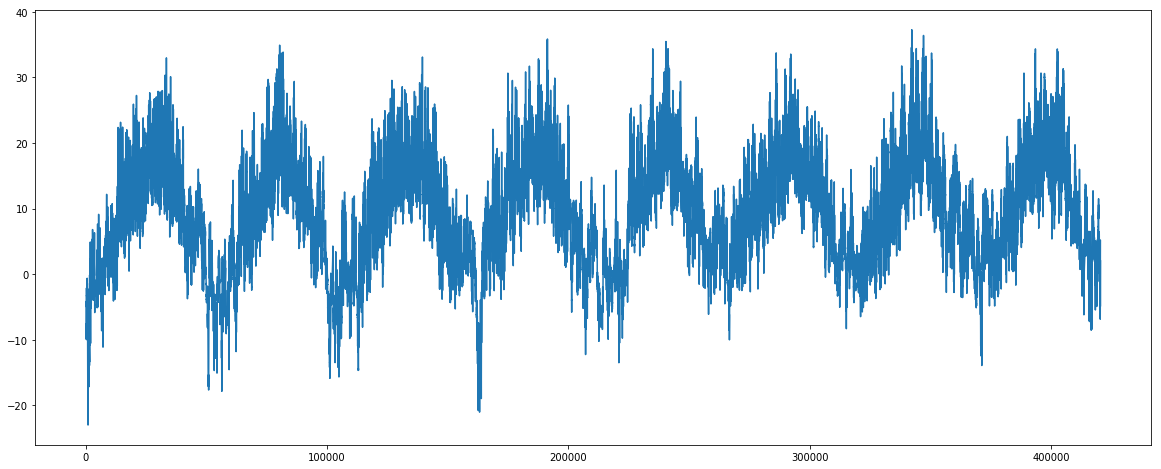

In [8]:
plt.figure(figsize=(20, 8))
# tempplt.plot(range(len(temp)), temp)

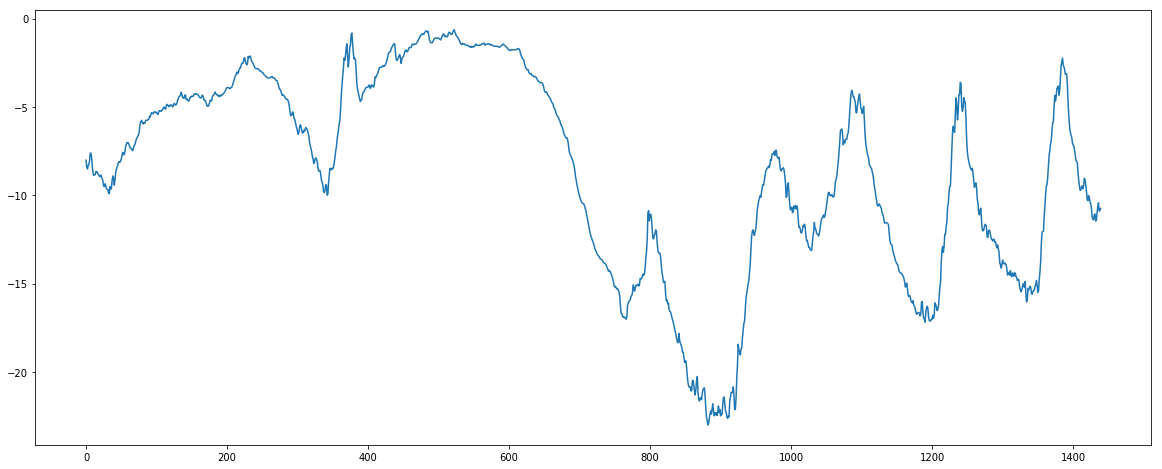

In [9]:
# temp => data per 10 mins => 144 data per day
plt.figure(figsize=(20, 8))
plt.plot(range(1440), temp[:1440])

In [47]:
import os

In [48]:
data_dir = './datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [83]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [50]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

In [21]:
climate_data = df.values[:, 1:]

In [22]:
climate_data

array([[996.52, -8.02, 265.4, ..., 1.03, 1.75, 152.3],
       [996.57, -8.41, 265.01, ..., 0.72, 1.5, 136.1],
       [996.53, -8.51, 264.91, ..., 0.19, 0.63, 171.6],
       ...,
       [999.82, -3.16, 270.01, ..., 1.08, 2.0, 215.2],
       [999.81, -4.23, 268.94, ..., 1.49, 2.16, 225.8],
       [999.82, -4.82, 268.36, ..., 1.23, 1.96, 184.9]], dtype=object)

In [84]:
# temp => 수치형 데이터 => 벡터화 필요성 없음

mean = float_data[:20000].mean(axis=0)
float_data -= mean

std = float_data[:20000].std(axis=0)
float_data /= std

In [85]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [86]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [87]:
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [88]:
# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [63]:
def evaluate_naive_method(steps, values):
    batch_maes = []
    for step in range(steps):
        samples, targets = next(values)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method(val_steps, val_gen)
evaluate_naive_method(test_steps, test_gen)

0.33551756286169604
0.353681239264234


In [43]:
climate_data.shape[-1]

14

In [64]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [65]:
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s 25ms/step - loss: 0.8914 - val_loss: 0.4536
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.4062 - val_loss: 0.3679
Epoch 3/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3115 - val_loss: 0.3682
Epoch 4/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2894 - val_loss: 0.4267
Epoch 5/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2757 - val_loss: 0.3741
Epoch 6/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2635 - val_loss: 0.3828
Epoch 7/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2574 - val_loss: 0.3806
Epoch 8/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2495 - val_loss: 0.3816
Epoch 9/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2450 - val_loss: 0.3802
Epoch 10/20
500/500 [==============================] - 12s 25ms/step - loss: 0.238

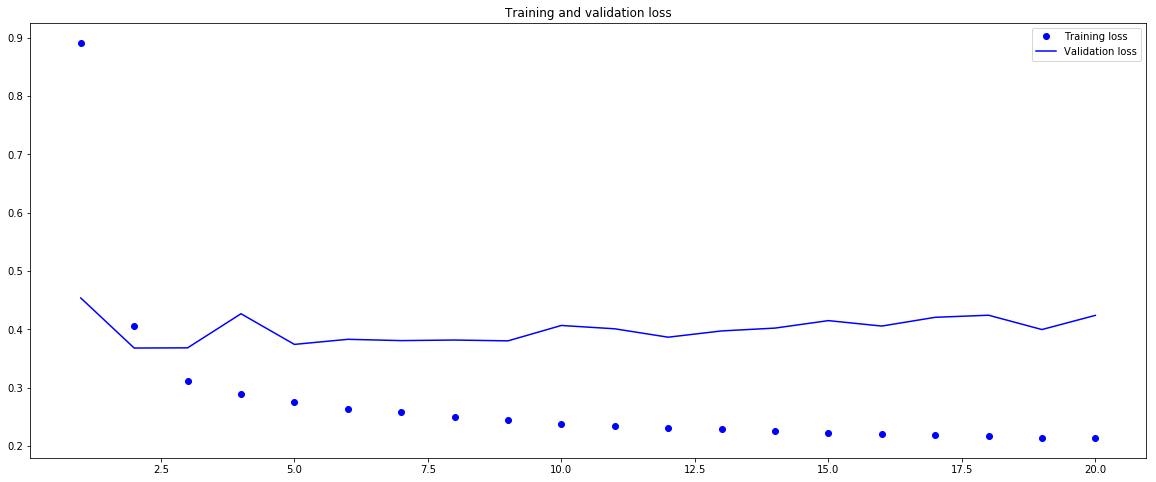

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [89]:
from keras.callbacks import TensorBoard

In [73]:
callbacks = [
    TensorBoard(
        log_dir='./tf_log/',
        histogram_freq=0, 
        batch_size=32, 
        write_graph=True, 
        write_grads=True, 
        write_images=True, 
        embeddings_freq=0, 
        embeddings_layer_names=None, 
        embeddings_metadata=None, 
        embeddings_data=None, 
        update_freq='epoch'
    )
]

In [91]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae', metrics=['acc'])
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              callbacks=[TensorBoard('./tf_log')]
                             )

Epoch 1/20
500/500 [==============================] - 176s 353ms/step - loss: 0.3534 - acc: 0.0000e+00 - val_loss: 0.3147 - val_acc: 0.0000e+00
Epoch 2/20
500/500 [==============================] - 177s 355ms/step - loss: 0.3326 - acc: 0.0000e+00 - val_loss: 0.3063 - val_acc: 0.0000e+00
Epoch 3/20
500/500 [==============================] - 178s 355ms/step - loss: 0.3226 - acc: 0.0000e+00 - val_loss: 0.3054 - val_acc: 0.0000e+00
Epoch 4/20
500/500 [==============================] - 177s 354ms/step - loss: 0.3155 - acc: 0.0000e+00 - val_loss: 0.3024 - val_acc: 0.0000e+00
Epoch 5/20
500/500 [==============================] - 176s 353ms/step - loss: 0.3082 - acc: 0.0000e+00 - val_loss: 0.3112 - val_acc: 0.0000e+00
Epoch 6/20
500/500 [==============================] - 176s 351ms/step - loss: 0.3031 - acc: 0.0000e+00 - val_loss: 0.3108 - val_acc: 0.0000e+00
Epoch 7/20
500/500 [==============================] - 177s 354ms/step - loss: 0.2984 - acc: 0.0000e+00 - val_loss: 0.3104 - val_acc: 0.0

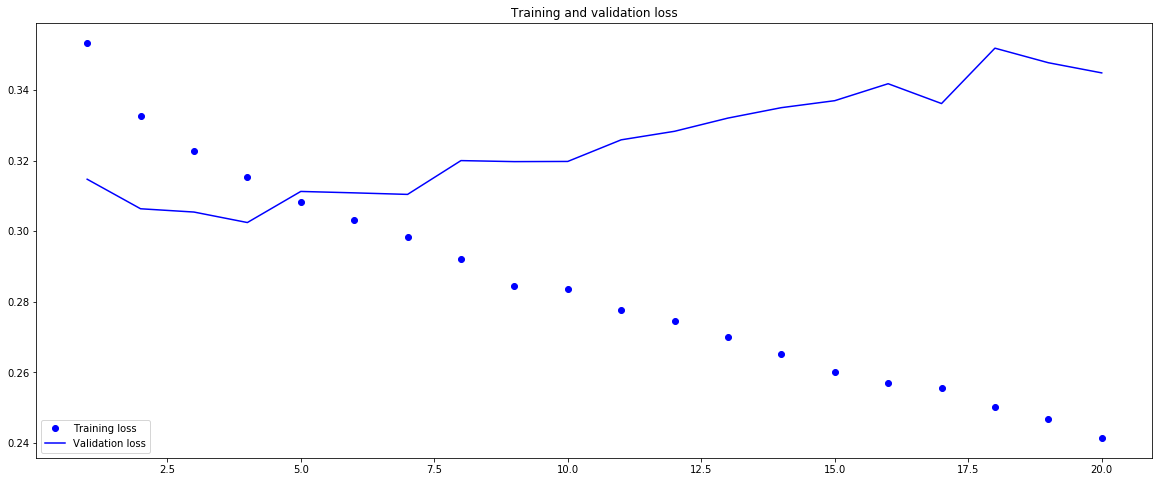

In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, climate_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [77]:
model = Sequential()
model.add(layers.Conv1D(64, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 64)          4544      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 49,921
Trainable params: 49,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 45s 89ms/step - loss: 0.3962 - val_loss: 0.3234
Epoch 2/20
500/500 [================

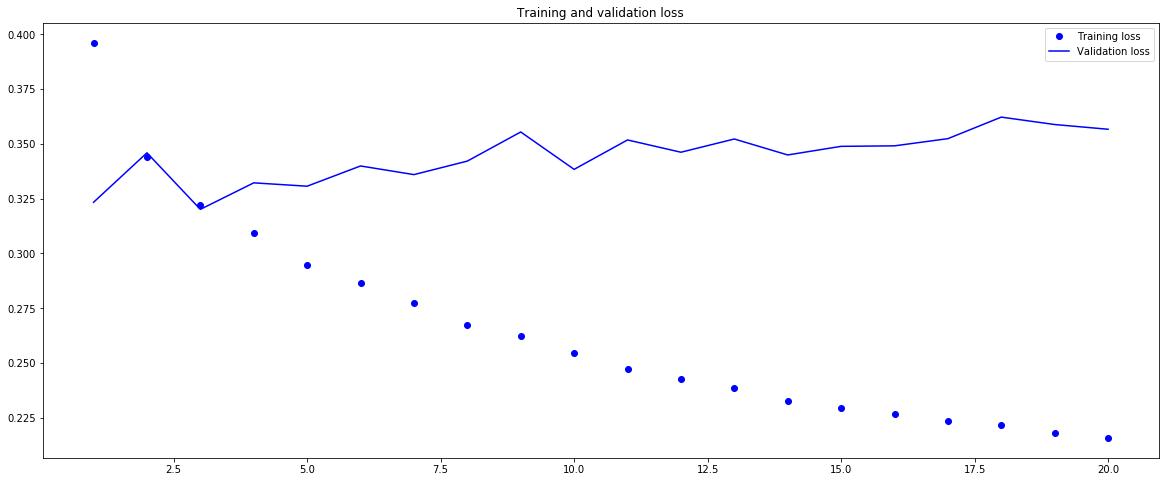

In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
model = Sequential()
model.add(layers.Conv1D(128, 3, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.GRU(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(layers.GRU(128, dropout=0.5, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 128)         5504      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 64)          24640     
_________________________________________________________________
gru_8 (GRU)                  (None, None, 64)          24768     
_________________________________________________________________
gru_9 (GRU)                  (None, 128)               74112     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 129,153
Trainable params: 129,153
Non-trainable params: 0
_________________________________________________________________
Epoc

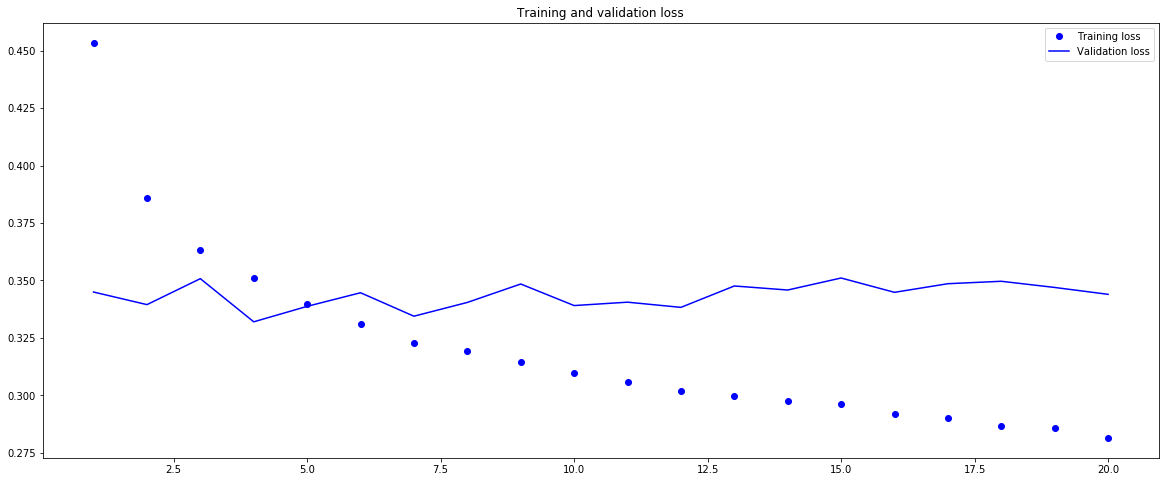

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()